<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Une-étude-de-santé-publique-avec-Python" data-toc-modified-id="Une-étude-de-santé-publique-avec-Python-1">Une étude de santé publique avec Python</a></span></li><li><span><a href="#1.--Librairies" data-toc-modified-id="1.--Librairies-2">1.  Librairies</a></span></li><li><span><a href="#2.-Données-sources" data-toc-modified-id="2.-Données-sources-3">2. Données sources</a></span></li><li><span><a href="#3.-Nombre-de-personnes-qui-pourrait-être-nourries-avec-la-disponibilité-alimentaire-d'origine-animale-ou-végétale" data-toc-modified-id="3.-Nombre-de-personnes-qui-pourrait-être-nourries-avec-la-disponibilité-alimentaire-d'origine-animale-ou-végétale-4">3. Nombre de personnes qui pourrait être nourries avec la disponibilité alimentaire d'origine animale ou végétale</a></span><ul class="toc-item"><li><span><a href="#3.1-Modification--de-la-dataframe--df_dispo_alim-et-df_pop" data-toc-modified-id="3.1-Modification--de-la-dataframe--df_dispo_alim-et-df_pop-4.1">3.1 Modification  de la dataframe  df_dispo_alim et df_pop</a></span></li><li><span><a href="#3.2-Réponse" data-toc-modified-id="3.2-Réponse-4.2">3.2 Réponse</a></span></li></ul></li><li><span><a href="#4.-Pays-ayant-le-plus/moins-de-disponibilité-par-habitant-et-leur-pertes-en-2017" data-toc-modified-id="4.-Pays-ayant-le-plus/moins-de-disponibilité-par-habitant-et-leur-pertes-en-2017-5">4. Pays ayant le plus/moins de disponibilité par habitant et leur pertes en 2017</a></span></li></ul></div>

# Une étude de santé publique avec Python

# 1.  Librairies

In [17]:
import statistics as s # Satistique descriptive.
import numpy as np # Manipuler des vecteurs(array).
import pandas as pd # Nettoyer et manipuler des dataframes.
import matplotlib.pyplot as plt # Créer des graphiques.
import seaborn as sns # Créer des graphiques plus élaborés.

In [18]:
# Visualisation graphique simple.
%matplotlib inline 
# Visualisation graphique interactive possible (ex: Zoom).
#%matplotlib notebook 

# 2. Données sources

Fichiers Excel au format .csv, provenant de la FAO.

*Comment raccourcir le chemin d'accés?* 

*/Users/###/Desktop/###/###/code_pour_wordpress.ipynb - C'est l'emplacement du Notebook.*

*/Users/###/Desktop/###/###/DAN-P4-FAO/dispo_alimentaire.csv - C'est l'emplacement du fichier csv.*

In [19]:
df_dispo_alim = pd.read_csv("DAN-P4-FAO/dispo_alimentaire.csv")                            
df_pop = pd.read_csv("DAN-P4-FAO/population.csv") 

On supprime les éventuelles doublons et on vérifie le type des données dans les dataframes.

*Supprimer les doublons: drop_duplicates (subset(quelle(s) colonne(s)?),keep)*

In [20]:
df_dispo_alim.info() 
# Dtype apriori ok
# Il y a ici aucune raison de conserver d'éventuels doublons. 
df_dispo_alim.drop_duplicates() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [21]:
df_pop.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [22]:
df_pop.info()
# Dtype apriori ok
# Il y a ici aucune raisons de conserver d'éventuels doublons. 
df_pop.drop_duplicates() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [23]:
df_pop.shape

(1416, 3)

In [24]:
# Statistique descpritive concernant la colonne "Valeur" de la dataframe df_pop.
df_pop[["Valeur"]].describe()

,Valeur
count,1.416000e+03
mean,3.144793e+04
std,1.300812e+05
min,7.930000e-01
25%,3.783410e+02
50%,5.126480e+03
75%,1.930666e+04
max,1.427648e+06


In [25]:
# Déterminons pour chaque pays,la population en milliers d'habitants en 2017. 
df_pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_pop_2017.sample(7)

,Zone,Année,Valeur
616,Îles Wallis-et-Futuna,2017,11.900
1390,Venezuela (République bolivarienne du),2017,29402.484
154,Bermudes,2017,63.049
250,Chine - RAS de Hong-Kong,2017,7306.322
676,Japon,2017,127502.725
244,Chili,2017,18470.439
1126,Sahara occidental,2017,552.615


In [26]:
# Quel est le pays avec la plus faible population en 2017?
resultat = df_pop_2017.loc[df_pop_2017["Valeur"] == df_pop_2017["Valeur"].min()]
resultat
                          

,Zone,Année,Valeur
1174,Saint-Siège,2017,0.793


In [27]:
zone_pop_min = resultat.iloc[0,0] 
zone_pop_min

'Saint-Siège'

In [28]:
pop_min = resultat.iloc[0,2] 
pop_min

0.7929999999999999

In [29]:
print("Au Vatican, aussi appelé" ,zone_pop_min, "il y a",
      round(pop_min,3), "milliers d'habitants, soit", round(pop_min*1000,3), "habitants.") 
   
print("En 2017, c'est le pays avec la plus faible population.")    


Au Vatican, aussi appelé Saint-Siège il y a 0.793 milliers d'habitants, soit 793.0 habitants.
En 2017, c'est le pays avec la plus faible population.


# 3. Nombre de personnes qui pourrait être nourries avec la disponibilité alimentaire d'origine animale ou végétale  


Afin de déterminer le nombre théorique de personnes qui pourraient être nourries nous allons nous intéresser à la disponibilité alimentaire mondiale et à la population.

On s'assure que les dataframes df_dispo_alim et df_pop peuvent être jointes correctement, c'est à dire que les deux dataframes ont une colonne identique qui peut servir de clé de jointure.

 ## 3.1 Modification  de la dataframe  df_dispo_alim et df_pop

In [30]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# On voit que les disponibilités alimentaires sont exclusivement d'orgine animale ou végétale.
df_dispo_alim.Origine.unique()

array(['animale', 'vegetale'], dtype=object)

In [32]:
# L' origine de la disponibilité alimentaires est-elle renseignée pour chaque ligne?
df_dispo_alim.Origine.isna().sum()
df_dispo_alim["Origine"].isna().sum()
# Oui, elle est bien renseignée pour chaque ligne de la dataframe "df_dispo_alim".

0

In [33]:
df_pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_pop_2017['Année'].isna().sum()

0

In [34]:
df_pop_2017.sample(10)

,Zone,Année,Valeur
628,Indonésie,2017,264650.963
616,Îles Wallis-et-Futuna,2017,11.900
838,Mexique,2017,124777.324
1204,Sénégal,2017,15419.355
1162,Saint-Martin (partie française),2017,36.560
910,Niger,2017,21602.382
994,Paraguay,2017,6867.061
874,Mozambique,2017,28649.018
670,Jamaïque,2017,2920.848
778,Malaisie,2017,31104.646


On vérifie le type des variables dans les dataframes df_pop et df_dispo_alim avant de les joindre à l'aide de la fonction merge.

In [35]:
df_pop_2017.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [36]:
df_dispo_alim.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [37]:
merge_1 = pd.merge(df_dispo_alim,df_pop_2017, how= 'left', on= 'Zone')
merge_1.sample(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
10416,Ouganda,Soja,vegetale,NaN,NaN,0.0,0.01,0.01,0.01,21.0,2.0,0.0,1.0,0.0,23.0,3.0,18.0,NaN,2017.0,41166.588
1681,Bermudes,Piments,vegetale,NaN,NaN,0.0,0.05,0.04,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2017.0,63.049
11481,Royaume-Uni,Haricots,vegetale,68.0,NaN,1.0,0.16,0.01,0.09,79.0,32.0,111.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5685,Guinée-Bissau,Huile d'Arachide,vegetale,NaN,NaN,112.0,4.62,12.65,NaN,8.0,0.0,0.0,8.0,NaN,10.0,NaN,NaN,-3.0,2017.0,1828.145
1249,Bahamas,Viande de Suides,animale,NaN,8.0,175.0,32.74,14.80,9.11,20.0,0.0,19.0,12.0,NaN,0.0,NaN,NaN,1.0,2017.0,381.755


In [38]:
merge_1.sample(5).dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

À la suite de la jointure des deux dataframes, on peut se demander si toutes les informations de la dataframe df_pop ont bien été ajouté à la dataframe merge_1.


In [39]:
annee_valeur_na = merge_1[merge_1['Année'].isna()]

annee_valeur_na.Zone.unique()

array(['Royaume-Uni', 'Tchéquie (la)'], dtype=object)

In [40]:
# Ici je compte le nombre de cellules vides
merge_1['Année'].isna().sum()

189

In [41]:
merge_1[merge_1['Année'].isna()]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
11450,Royaume-Uni,Abats Comestible,animale,0.0,NaN,7.0,1.99,0.20,0.89,126.0,103.0,67.0,126.0,NaN,162.0,NaN,NaN,0.0,NaN,NaN
11451,Royaume-Uni,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.33,0.00,0.00,21.0,2.0,24.0,21.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
11452,Royaume-Uni,"Alcool, non Comestible",vegetale,NaN,582.0,NaN,NaN,NaN,NaN,582.0,99.0,680.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
11453,Royaume-Uni,Aliments pour enfants,vegetale,NaN,NaN,15.0,1.50,0.12,0.63,95.0,6.0,101.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11454,Royaume-Uni,Ananas,vegetale,NaN,NaN,4.0,3.41,0.01,0.03,223.0,8.0,231.0,216.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,Tchéquie (la),Viande de Suides,animale,NaN,NaN,178.0,41.17,14.64,10.60,441.0,101.0,299.0,441.0,NaN,243.0,NaN,0.0,0.0,NaN,NaN
13755,Tchéquie (la),Viande de Volailles,animale,NaN,NaN,71.0,19.09,4.78,6.48,204.0,50.0,101.0,204.0,NaN,153.0,NaN,0.0,NaN,NaN,NaN
13756,Tchéquie (la),"Viande, Autre",animale,NaN,NaN,13.0,4.06,0.54,1.95,44.0,19.0,23.0,43.0,NaN,40.0,NaN,NaN,0.0,NaN,NaN
13757,Tchéquie (la),Vin,vegetale,NaN,NaN,18.0,9.17,NaN,0.00,160.0,30.0,142.0,98.0,NaN,49.0,NaN,62.0,0.0,NaN,NaN


In [42]:
#"Royaume-Uni" n'est pas dans la dataframe df_pop.
df_pop_2017[df_pop_2017['Zone'] == 'Royaume-Uni']
df_pop[df_pop['Zone'] == 'Royaume-Uni']


,Zone,Année,Valeur


In [43]:
# "Tchéquie (la)" n'est pas dans la dataframe df_pop.
df_pop_2017[df_pop_2017['Zone'] == 'Tchéquie (la)']
df_pop[df_pop['Zone'] == 'Tchéquie (la)']

,Zone,Année,Valeur


In [44]:
df_pop['Zone'].eq("Royaume-Uni").any()

False

In [45]:
# La population du "Royaume-Uni" ne serait pas disponible.
df_pop['Zone'].isin(['Royaume-Uni']).any() # OUI ou NON? résultat dans sa globalité...
df_pop['Zone'].str.match("Royaume-Uni") # OUI ou NON? pour chaque ligne.

# Par exemple la population du "Royaume-Uni" serait disponible 
# MAIS sous une autre forme de caractères...
df_pop[df_pop['Zone'].str.contains("Royaume-Uni")] # Affiche les lignes qui contiennent "Royaume-Uni"
df_pop['Zone'].str.contains("Royaume-Uni").sum()# Donne le nombre de lignes qui contiennent "Royaume-Uni"
df_pop['Zone'].str.match("Royaume-Uni").sum() # Idem

# Oui effectivement la population du "Royaume-Uni"
# est présente sous une autre forme de caractère...
df_pop['Zone'].eq("Royaume-Uni").any() # Toutes les cellules de la colonne "Zone" contiennent une valeur équivalente à "Royaume-Uni". 

False

In [46]:
# La population du "Royaume-Uni" serait disponible 
# MAIS avec d'autres caractères...
df_pop[df_pop['Zone'].str.contains("Royaume-Uni")] # Montre les lignes qui contiennent au moins en partie "Royaume-Uni" dans la colonne "Zone".

,Zone,Année,Valeur
1110,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2013,64984.018
1111,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2014,65423.047
1112,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2015,65860.146
1113,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2016,66297.944
1114,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66727.461
1115,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2018,67141.684


In [47]:
df_dispo_alim[df_dispo_alim['Zone'].str.contains("Royaume-Uni")]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11450,Royaume-Uni,Abats Comestible,animale,0.0,NaN,7.0,1.99,0.20,0.89,126.0,103.0,67.0,126.0,NaN,162.0,NaN,NaN,0.0
11451,Royaume-Uni,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.33,0.00,0.00,21.0,2.0,24.0,21.0,NaN,NaN,NaN,NaN,0.0
11452,Royaume-Uni,"Alcool, non Comestible",vegetale,NaN,582.0,NaN,NaN,NaN,NaN,582.0,99.0,680.0,NaN,NaN,0.0,NaN,NaN,0.0
11453,Royaume-Uni,Aliments pour enfants,vegetale,NaN,NaN,15.0,1.50,0.12,0.63,95.0,6.0,101.0,95.0,NaN,NaN,NaN,NaN,NaN
11454,Royaume-Uni,Ananas,vegetale,NaN,NaN,4.0,3.41,0.01,0.03,223.0,8.0,231.0,216.0,7.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,Royaume-Uni,Viande de Suides,animale,NaN,NaN,235.0,25.79,22.74,7.12,1635.0,246.0,1047.0,1635.0,NaN,833.0,NaN,0.0,NaN
11541,Royaume-Uni,Viande de Volailles,animale,NaN,NaN,112.0,31.55,6.34,12.78,2091.0,383.0,812.0,2000.0,NaN,1662.0,NaN,91.0,NaN
11542,Royaume-Uni,"Viande, Autre",animale,NaN,NaN,8.0,1.54,0.22,1.42,97.0,10.0,98.0,97.0,NaN,9.0,NaN,0.0,0.0
11543,Royaume-Uni,Vin,vegetale,NaN,NaN,35.0,18.69,NaN,0.00,1185.0,101.0,1285.0,1185.0,NaN,0.0,NaN,NaN,0.0


In [48]:
df_pop[df_pop['Zone'].str.contains("Tchéquie")]

,Zone,Année,Valeur
1302,Tchéquie,2013,10586.533
1303,Tchéquie,2014,10591.108
1304,Tchéquie,2015,10601.397
1305,Tchéquie,2016,10618.857
1306,Tchéquie,2017,10641.034
1307,Tchéquie,2018,10665.677


In [49]:
df_dispo_alim[df_dispo_alim['Zone'].str.contains("Tchéquie")]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13665,Tchéquie (la),Abats Comestible,animale,NaN,NaN,10.0,3.07,0.29,1.53,33.0,10.0,23.0,33.0,NaN,20.0,NaN,NaN,NaN
13666,Tchéquie (la),"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.29,0.00,0.00,3.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
13667,Tchéquie (la),"Alcool, non Comestible",vegetale,NaN,14.0,NaN,NaN,NaN,NaN,14.0,33.0,12.0,NaN,NaN,35.0,NaN,NaN,0.0
13668,Tchéquie (la),Aliments pour enfants,vegetale,NaN,NaN,8.0,0.78,0.06,0.33,8.0,1.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
13669,Tchéquie (la),Ananas,vegetale,NaN,NaN,2.0,1.42,0.01,0.01,16.0,3.0,19.0,15.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,Tchéquie (la),Viande de Suides,animale,NaN,NaN,178.0,41.17,14.64,10.60,441.0,101.0,299.0,441.0,NaN,243.0,NaN,0.0,0.0
13755,Tchéquie (la),Viande de Volailles,animale,NaN,NaN,71.0,19.09,4.78,6.48,204.0,50.0,101.0,204.0,NaN,153.0,NaN,0.0,NaN
13756,Tchéquie (la),"Viande, Autre",animale,NaN,NaN,13.0,4.06,0.54,1.95,44.0,19.0,23.0,43.0,NaN,40.0,NaN,NaN,0.0
13757,Tchéquie (la),Vin,vegetale,NaN,NaN,18.0,9.17,NaN,0.00,160.0,30.0,142.0,98.0,NaN,49.0,NaN,62.0,0.0


In [50]:
# On fait le remplacement dans la dataframe "df_pop".
df_pop = df_pop.replace(to_replace ="Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", value="Royaume-Uni")



In [51]:
# On fait le remplacement dans la dataframe "df_dispo_alim".
df_dispo_alim = df_dispo_alim.replace(to_replace ="Tchéquie (la)", value="Tchéquie")

In [52]:
# Vérification
df_pop[df_pop['Zone'].str.contains("Royaume-Uni")]

,Zone,Année,Valeur
1110,Royaume-Uni,2013,64984.018
1111,Royaume-Uni,2014,65423.047
1112,Royaume-Uni,2015,65860.146
1113,Royaume-Uni,2016,66297.944
1114,Royaume-Uni,2017,66727.461
1115,Royaume-Uni,2018,67141.684


In [53]:
# Vérification
df_dispo_alim[df_dispo_alim['Zone'].str.contains("Royaume-Uni")]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11450,Royaume-Uni,Abats Comestible,animale,0.0,NaN,7.0,1.99,0.20,0.89,126.0,103.0,67.0,126.0,NaN,162.0,NaN,NaN,0.0
11451,Royaume-Uni,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.33,0.00,0.00,21.0,2.0,24.0,21.0,NaN,NaN,NaN,NaN,0.0
11452,Royaume-Uni,"Alcool, non Comestible",vegetale,NaN,582.0,NaN,NaN,NaN,NaN,582.0,99.0,680.0,NaN,NaN,0.0,NaN,NaN,0.0
11453,Royaume-Uni,Aliments pour enfants,vegetale,NaN,NaN,15.0,1.50,0.12,0.63,95.0,6.0,101.0,95.0,NaN,NaN,NaN,NaN,NaN
11454,Royaume-Uni,Ananas,vegetale,NaN,NaN,4.0,3.41,0.01,0.03,223.0,8.0,231.0,216.0,7.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,Royaume-Uni,Viande de Suides,animale,NaN,NaN,235.0,25.79,22.74,7.12,1635.0,246.0,1047.0,1635.0,NaN,833.0,NaN,0.0,NaN
11541,Royaume-Uni,Viande de Volailles,animale,NaN,NaN,112.0,31.55,6.34,12.78,2091.0,383.0,812.0,2000.0,NaN,1662.0,NaN,91.0,NaN
11542,Royaume-Uni,"Viande, Autre",animale,NaN,NaN,8.0,1.54,0.22,1.42,97.0,10.0,98.0,97.0,NaN,9.0,NaN,0.0,0.0
11543,Royaume-Uni,Vin,vegetale,NaN,NaN,35.0,18.69,NaN,0.00,1185.0,101.0,1285.0,1185.0,NaN,0.0,NaN,NaN,0.0


In [54]:
# Vérification
df_pop[df_pop['Zone'].str.contains("Tchéquie")]

,Zone,Année,Valeur
1302,Tchéquie,2013,10586.533
1303,Tchéquie,2014,10591.108
1304,Tchéquie,2015,10601.397
1305,Tchéquie,2016,10618.857
1306,Tchéquie,2017,10641.034
1307,Tchéquie,2018,10665.677


In [55]:
# Vérification
df_dispo_alim[df_dispo_alim['Zone'].str.contains("Tchéquie")]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13665,Tchéquie,Abats Comestible,animale,NaN,NaN,10.0,3.07,0.29,1.53,33.0,10.0,23.0,33.0,NaN,20.0,NaN,NaN,NaN
13666,Tchéquie,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.29,0.00,0.00,3.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
13667,Tchéquie,"Alcool, non Comestible",vegetale,NaN,14.0,NaN,NaN,NaN,NaN,14.0,33.0,12.0,NaN,NaN,35.0,NaN,NaN,0.0
13668,Tchéquie,Aliments pour enfants,vegetale,NaN,NaN,8.0,0.78,0.06,0.33,8.0,1.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
13669,Tchéquie,Ananas,vegetale,NaN,NaN,2.0,1.42,0.01,0.01,16.0,3.0,19.0,15.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,Tchéquie,Viande de Suides,animale,NaN,NaN,178.0,41.17,14.64,10.60,441.0,101.0,299.0,441.0,NaN,243.0,NaN,0.0,0.0
13755,Tchéquie,Viande de Volailles,animale,NaN,NaN,71.0,19.09,4.78,6.48,204.0,50.0,101.0,204.0,NaN,153.0,NaN,0.0,NaN
13756,Tchéquie,"Viande, Autre",animale,NaN,NaN,13.0,4.06,0.54,1.95,44.0,19.0,23.0,43.0,NaN,40.0,NaN,NaN,0.0
13757,Tchéquie,Vin,vegetale,NaN,NaN,18.0,9.17,NaN,0.00,160.0,30.0,142.0,98.0,NaN,49.0,NaN,62.0,0.0


In [56]:
# Vérification
df_pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_pop_2017['Année'].isna().sum()

0

In [57]:
# On merge à nouveau la dataframe "df_dispo_alim" et "df_pop", avec la colonne "Zone" pour clé de jointure.
# "Jointure à gauche" on se référe avant tout aux informationx sur la disponibilité alimentaire.
merge_1= pd.merge(df_dispo_alim, df_pop_2017, on='Zone', how="left")

In [58]:
merge_1.sample(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
14964,Zambie,"Viande, Autre",animale,NaN,NaN,8.0,2.65,0.22,1.31,38.0,0.0,0.0,39.0,NaN,39.0,NaN,NaN,0.0,2017,16853.599
6601,Irlande,Huiles de Foie de Poisso,animale,NaN,0.0,0.0,0.01,0.04,0.00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2017,4753.279
8325,Madagascar,"Viande, Autre",animale,NaN,NaN,1.0,0.35,0.03,0.17,8.0,0.0,0.0,8.0,NaN,8.0,NaN,NaN,NaN,2017,25570.512
375,Allemagne,Huile d'Olive,vegetale,NaN,1.0,18.0,0.74,2.04,NaN,63.0,5.0,67.0,62.0,NaN,NaN,NaN,NaN,0.0,2017,82658.409
12435,Sainte-Lucie,Oeufs,animale,NaN,0.0,11.0,3.20,0.75,0.86,1.0,NaN,0.0,1.0,0.0,1.0,0.0,NaN,NaN,2017,180.954


In [59]:
merge_1[(merge_1["Zone"]== "Royaume-Uni" )|(merge_1["Zone"]== "Tchéquie")]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
11450,Royaume-Uni,Abats Comestible,animale,0.0,NaN,7.0,1.99,0.20,0.89,126.0,103.0,67.0,126.0,NaN,162.0,NaN,NaN,0.0,2017,66727.461
11451,Royaume-Uni,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.33,0.00,0.00,21.0,2.0,24.0,21.0,NaN,NaN,NaN,NaN,0.0,2017,66727.461
11452,Royaume-Uni,"Alcool, non Comestible",vegetale,NaN,582.0,NaN,NaN,NaN,NaN,582.0,99.0,680.0,NaN,NaN,0.0,NaN,NaN,0.0,2017,66727.461
11453,Royaume-Uni,Aliments pour enfants,vegetale,NaN,NaN,15.0,1.50,0.12,0.63,95.0,6.0,101.0,95.0,NaN,NaN,NaN,NaN,NaN,2017,66727.461
11454,Royaume-Uni,Ananas,vegetale,NaN,NaN,4.0,3.41,0.01,0.03,223.0,8.0,231.0,216.0,7.0,NaN,NaN,NaN,0.0,2017,66727.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,Tchéquie,Viande de Suides,animale,NaN,NaN,178.0,41.17,14.64,10.60,441.0,101.0,299.0,441.0,NaN,243.0,NaN,0.0,0.0,2017,10641.034
13755,Tchéquie,Viande de Volailles,animale,NaN,NaN,71.0,19.09,4.78,6.48,204.0,50.0,101.0,204.0,NaN,153.0,NaN,0.0,NaN,2017,10641.034
13756,Tchéquie,"Viande, Autre",animale,NaN,NaN,13.0,4.06,0.54,1.95,44.0,19.0,23.0,43.0,NaN,40.0,NaN,NaN,0.0,2017,10641.034
13757,Tchéquie,Vin,vegetale,NaN,NaN,18.0,9.17,NaN,0.00,160.0,30.0,142.0,98.0,NaN,49.0,NaN,62.0,0.0,2017,10641.034


In [60]:
merge_1.sample(5).dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

La variable "Zone" des deux dataframes "df_dispo_alim" et "df_pop" a bien été uniformisé. La fonction merge a ainsi correctemment fonctionné. 

## 3.2 Réponse

In [61]:
df_pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [62]:
# On veut se référer à l'année 2017, on sélectionne les lignes de la dataframe "df_pop" 
# qui font référence à l'année 2017.
df_pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_pop_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [63]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [64]:
df_dispo_alim.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [65]:
df_dispo_alim_modif = df_dispo_alim[["Zone","Origine","Disponibilité alimentaire (Kcal/personne/jour)"]]
df_dispo_alim_modif.head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0


In [66]:
# Observation
df_dispo_alim_modif_afghanistan = df_dispo_alim_modif[df_dispo_alim_modif["Zone"]== "Afghanistan"]
df_dispo_alim_modif_afghanistan
df_dispo_alim_modif_afghanistan .groupby("Origine").sum()

,Disponibilité alimentaire (Kcal/personne/jour)
Origine,
animale,216.0
vegetale,1871.0


In [67]:
df_dispo_alim_modif = df_dispo_alim[["Zone","Origine","Disponibilité alimentaire (Kcal/personne/jour)"]]
df_dispo_alim_modif

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
...,...,...,...
15600,Îles Salomon,animale,45.0
15601,Îles Salomon,animale,11.0
15602,Îles Salomon,animale,0.0
15603,Îles Salomon,vegetale,0.0


In [68]:
# On compte dans chaque colonne le nombre de cellules vides 
#(c'est faculatatif, on a l'intention d'ajouter les lignes qui correspondent à la même zone).
avt = df_dispo_alim_modif.isna().sum()
avt

Zone                                                 0
Origine                                              0
Disponibilité alimentaire (Kcal/personne/jour)    1364
dtype: int64

In [69]:
# On supprime les lignes qui contiennent une cellule vide.
#(c'est faculatatif, on a l'intention d'ajouter les lignes qui correspondent à la même zone).
avt.dropna(inplace=True)

In [70]:
#(c'est faculatatif, on a l'intention d'ajouter les lignes qui correspondent à la même zone).
avt.isna().sum()

0

In [71]:
df_dispo_alim_modif

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
...,...,...,...
15600,Îles Salomon,animale,45.0
15601,Îles Salomon,animale,11.0
15602,Îles Salomon,animale,0.0
15603,Îles Salomon,vegetale,0.0


In [72]:
# Avec le reset_index() "Zone" n'est pas placé en index!
df_dispo_alim_modif = df_dispo_alim_modif.groupby("Zone").sum().reset_index()
df_dispo_alim_modif.head()


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


En moyenne, pour les hommes, le besoin énergétique moyen se situe entre 2400 et 2700 kcal.
En moyenne, pour les femmes, le besoin énergétique moyen se situe entre 2000 et 2200 kcal.

Source: Organisation mondial de la santé d'après l'article "Calories: femme et homme,des besoins différents?" de futura-sciences

Nous allons réaliser une jointure entre la dataframe df_pop_2017 et df_dispo_alim.
On souhaite que toutes lignes dans les deux dataframe soient jointes par le biais de la colonne "Zone" présente dans les deux tables.




In [73]:
df_pop_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [74]:
merge_1 = pd.merge(df_dispo_alim_modif[["Zone","Disponibilité alimentaire (Kcal/personne/jour)"]],df_pop_2017[["Zone","Valeur"]], how= 'left', on= 'Zone')
merge_1.head()


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur
0,Afghanistan,2087.0,36296.113
1,Afrique du Sud,3020.0,57009.756
2,Albanie,3188.0,2884.169
3,Algérie,3293.0,41389.189
4,Allemagne,3503.0,82658.409


In [75]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            174 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)  174 non-null    float64
 2   Valeur                                          174 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.4+ KB


À l'échelle mondial en 2017,

$ Disponibilité_alimentaire_(Kcal/personne/jour) = (∑_Disponibilité_alimentaire_(Kcal/personne/jour)_de_chaque pays_ *_population_du_pays)_/_Population_total_en_2017 $

**La population total en 2017 ("pop_total_2017" en millier d'habitant) est la population pour laquelle des valeurs concernant la disponibilité alimentaire est disponible.**

In [76]:
somme_dispo_alim_2017_par_pays = round((merge_1["Disponibilité alimentaire (Kcal/personne/jour)"]
                                        * merge_1["Valeur"]).sum())
somme_dispo_alim_2017_par_pays # en Kcal/jour

21182162747

In [77]:
# Rappel: ici la population total en 2017 est la population pour laquelle des valeurs
# concernant les disponibilités alimentaires sont disponibles.
pop_total_2017 = round(merge_1["Valeur"].sum())
pop_total_2017 # en milliers d'habitant

7369269

In [78]:
besoin_energ_moyen = [2400,2700,2000,2200]
moyenne_besoin_energ_moyen = s.mean(besoin_energ_moyen)
moyenne_besoin_energ_moyen

2325

In [79]:
dispo_alim = round(somme_dispo_alim_2017_par_pays / pop_total_2017)
dispo_alim # en Kcal/jour/personne

2874

In [80]:
pop_po_dalimenter = round((pop_total_2017 * dispo_alim)/ moyenne_besoin_energ_moyen)
pop_po_dalimenter # en milliers d'habitant

9109367

In [81]:
ratio = round(pop_po_dalimenter / pop_total_2017,2)
ratio 

1.24

In [82]:
print("Le besoin énérgétique moyen d'un être humain tout confondu est de " + str(moyenne_besoin_energ_moyen) + " Kcal/personne/jour.") 
print("La disponibilité alimentaire mondiale en 2017 est de " +  str(round(dispo_alim)) + " Kcal/personne/jour.")
print("La disponibilité alimentaire mondiale en 2017 est en mesure de nourir " + str(round(ratio,2)) + " fois la population mondiale.")
print(str(round(pop_po_dalimenter)) + " milliers d'habitant peuvent être nourris dans le monde en 2017." )

Le besoin énérgétique moyen d'un être humain tout confondu est de 2325 Kcal/personne/jour.
La disponibilité alimentaire mondiale en 2017 est de 2874 Kcal/personne/jour.
La disponibilité alimentaire mondiale en 2017 est en mesure de nourir 1.24 fois la population mondiale.
9109367 milliers d'habitant peuvent être nourris dans le monde en 2017.


# 4. Pays ayant le plus/moins de disponibilité par habitant et leur pertes en 2017

On commence par déterminer les dix pays ayant **le plus de disponibilité par habitant (Kcal/jour/personne)** en 2017.

On renseigne également pour chaque de ces pays, leur **pertes (en milliers de tonnes)**.

In [83]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [84]:
# Ici on s'aperçoit que pour chaque pays, la disponibilité alimentaire en Kcal/personne/jour 
# ainsi que les pertes sont donnés pour chaque produit (le type de produit, ne nous intéresse pas ici).
df_dispo_alim_modif = df_dispo_alim[["Zone","Disponibilité alimentaire (Kcal/personne/jour)","Pertes"]]

# Exemple
df_dispo_alim_modif[df_dispo_alim_modif["Zone"]== "Jordanie"]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Pertes
7119,Jordanie,4.0,NaN
7120,Jordanie,0.0,NaN
7121,Jordanie,NaN,NaN
7122,Jordanie,3.0,NaN
7123,Jordanie,1.0,NaN
...,...,...,...
7207,Jordanie,0.0,NaN
7208,Jordanie,117.0,NaN
7209,Jordanie,0.0,NaN
7210,Jordanie,0.0,NaN


In [85]:
# 0n additionne la disponibilité alimentaire (Kcal/pers/jour) par pays.
# Sans le reset_index() Zone est bien en index ici!
df_dispo_alim_modif = df_dispo_alim_modif.groupby("Zone").sum().astype(int)
df_dispo_alim_modif

# Exemple - Filtrer les résulat d'un group by() avec query!
df_dispo_alim_modif.query("Zone=='Jordanie'")

,Disponibilité alimentaire (Kcal/personne/jour),Pertes
Zone,,
Jordanie,3099,389


In [86]:
# On ordonne la disponibilité alimentaire par ordre décroissant afin d'afficher 
# en premier les pays ayant le plus de disponibilité par habitant.
plus_dispo_hab = df_dispo_alim_modif.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", 
                                            ascending=False).head(10)
plus_dispo_hab

,Disponibilité alimentaire (Kcal/personne/jour),Pertes
Zone,,
Autriche,3770,459
Belgique,3737,564
Turquie,3708,12036
États-Unis d'Amérique,3682,7162
Israël,3610,220
Irlande,3602,236
Italie,3578,1861
Luxembourg,3540,11
Égypte,3518,7608


In [87]:
# Exemple - Filtrer les résulat d'un group by() avec query!
plus_dispo_hab.query("Zone=='Irlande'")

,Disponibilité alimentaire (Kcal/personne/jour),Pertes
Zone,,
Irlande,3602,236


In [88]:
plus_dispo_hab.index

Index(['Autriche', 'Belgique', 'Turquie', 'États-Unis d'Amérique', 'Israël',
       'Irlande', 'Italie', 'Luxembourg', 'Égypte', 'Allemagne'],
      dtype='object', name='Zone')

In [89]:
plus_dispo_hab.columns

Index(['Disponibilité alimentaire (Kcal/personne/jour)', 'Pertes'], dtype='object')

In [90]:
# On ordonne la disponibilité alimentaire par ordre croissant afin d'afficher 
# en premier les pays ayant le moins de disponibilité par habitant.
moins_dispo_hab = df_dispo_alim_modif.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", 
                                            ascending=True).head(10)
moins_dispo_hab

,Disponibilité alimentaire (Kcal/personne/jour),Pertes
Zone,,
République centrafricaine,1879,122
Zambie,1924,242
Madagascar,2056,966
Afghanistan,2087,1135
Haïti,2089,679
République populaire démocratique de Corée,2093,1066
Tchad,2109,459
Zimbabwe,2113,188
Ouganda,2126,991


In [91]:
moins_dispo_hab.index

Index(['République centrafricaine', 'Zambie', 'Madagascar', 'Afghanistan',
       'Haïti', 'République populaire démocratique de Corée', 'Tchad',
       'Zimbabwe', 'Ouganda', 'Timor-Leste'],
      dtype='object', name='Zone')

In [92]:
moins_dispo_hab.columns

Index(['Disponibilité alimentaire (Kcal/personne/jour)', 'Pertes'], dtype='object')

In [93]:
# On ajoute une colonne "Type" permettant de distinguer les pays avec le plus de disponibilité alimentaire
# vs. les pays avec le moins de disponibilité.
plus_dispo_hab['Type']= 'Pays avec le + dispo alim (Kcal/pers./jour)'
moins_dispo_hab['Type']= 'Pays avec le - dispo alim (Kcal/pers./jour)'

In [94]:
# On assemble les deux tableaux.
assemblage = pd.concat([plus_dispo_hab, moins_dispo_hab])
assemblage

,Disponibilité alimentaire (Kcal/personne/jour),Pertes,Type
Zone,,,
Autriche,3770,459,Pays avec le + dispo alim (Kcal/pers./jour)
Belgique,3737,564,Pays avec le + dispo alim (Kcal/pers./jour)
Turquie,3708,12036,Pays avec le + dispo alim (Kcal/pers./jour)
États-Unis d'Amérique,3682,7162,Pays avec le + dispo alim (Kcal/pers./jour)
Israël,3610,220,Pays avec le + dispo alim (Kcal/pers./jour)
Irlande,3602,236,Pays avec le + dispo alim (Kcal/pers./jour)
Italie,3578,1861,Pays avec le + dispo alim (Kcal/pers./jour)
Luxembourg,3540,11,Pays avec le + dispo alim (Kcal/pers./jour)
Égypte,3518,7608,Pays avec le + dispo alim (Kcal/pers./jour)


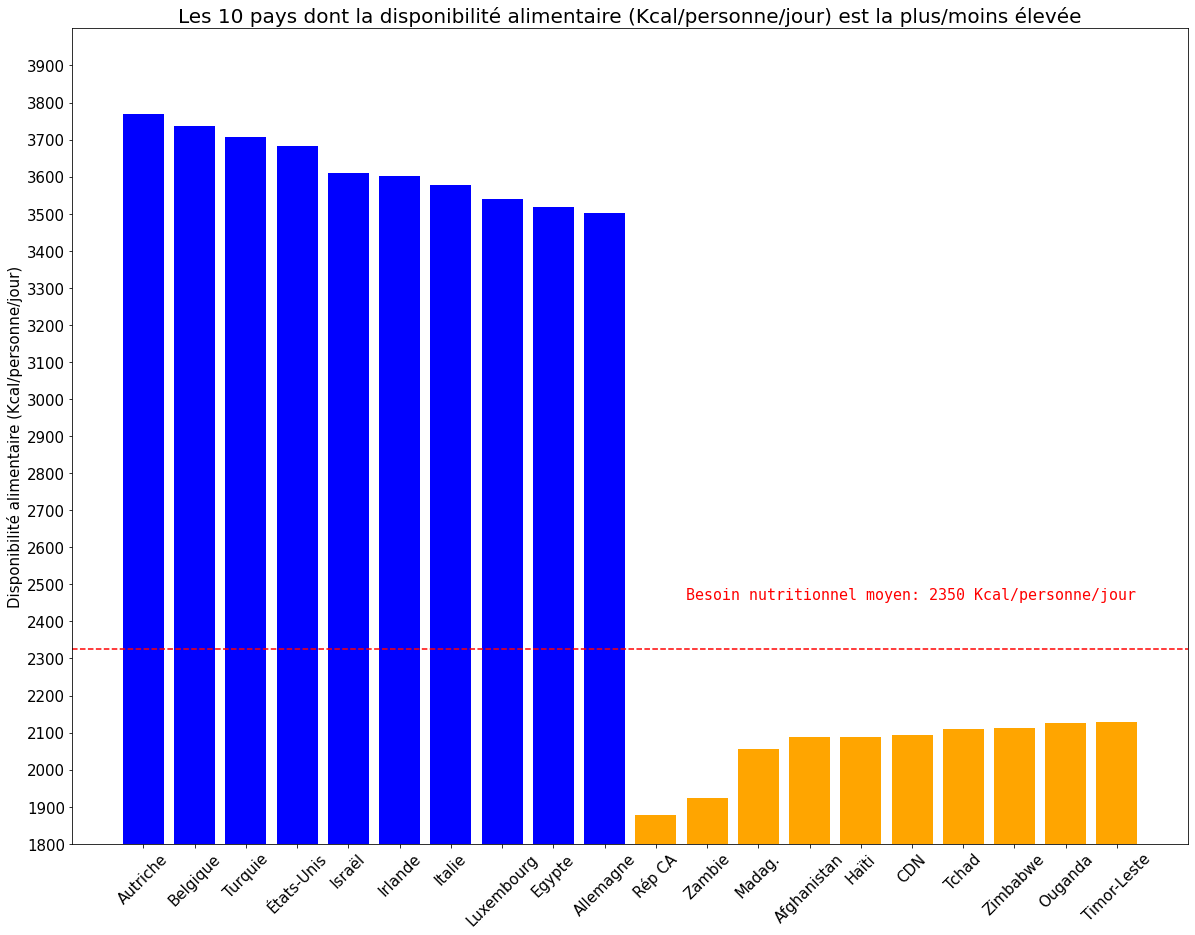

In [95]:
# Diagramme à barre pour les 10 pays dont la disponibilité alimentaire (Kcal/personne/jour) est la plus/moins faible.
# Le nom des pays est entré en "dur" afin de maintenir la lisibilité de l'axe x.

names_desc = ['Autriche', 'Belgique', 'Turquie','États-Unis',
         'Israël', 'Irlande',
        'Italie', 'Luxembourg', 'Egypte','Allemagne']

values_desc = plus_dispo_hab['Disponibilité alimentaire (Kcal/personne/jour)']

names_asc = ['Rép CA', 'Zambie', 'Madag.','Afghanistan',
         'Haïti', 'CDN',
        'Tchad', 'Zimbabwe', 'Ouganda','Timor-Leste']

values_asc = moins_dispo_hab['Disponibilité alimentaire (Kcal/personne/jour)']


fig, ax = plt.subplots(figsize=(20,15))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

ax.bar(names_desc, values_desc, color='blue')
ax.bar(names_asc, values_asc, color='orange')

# Axe x
plt.xticks(rotation = 45)

# Axe y.
ax.set_ylim(1800,4000)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(1800, 4000, 100))
ax.set_ylabel("Disponibilité alimentaire (Kcal/personne/jour)", size=15)

ax.set_title('Les 10 pays dont la disponibilité alimentaire (Kcal/personne/jour) est la plus/moins élevée',
            fontsize=20)


# Ligne horizontal
ax.axhline(y = moyenne_besoin_energ_moyen, linestyle='dashed', color= 'red')

# Texte
ax.text = plt.text(x=0.55, # en bas à gauche (0.0), en haut à droite (1,1) avec transform=ax.transAxes
               y=0.3, # en bas à gauche (0.0), en haut à droite (1,1) avec transform=ax.transAxes
               s =  "Besoin nutritionnel moyen: 2350 Kcal/personne/jour", # texte
               fontdict= dict(fontsize=15, family= 'monospace')#,
               # caractéristique du contour
               #bbox= {"facecolor": '#ff7f0e', # la couleur de fond
                     #"edgecolor": "b", # couleur du bord
                     #"alpha": 0.5, # transparence
                     #"pad": 8, # distance entre le texte et le bord
                    # }
              ,transform=ax.transAxes) # le système de coordoonéee est le suivant: 
# en bas à gauche (0.0), en haut à droite (1,1).
ax.text.set_color('r') # couleur du texte

plt.show()








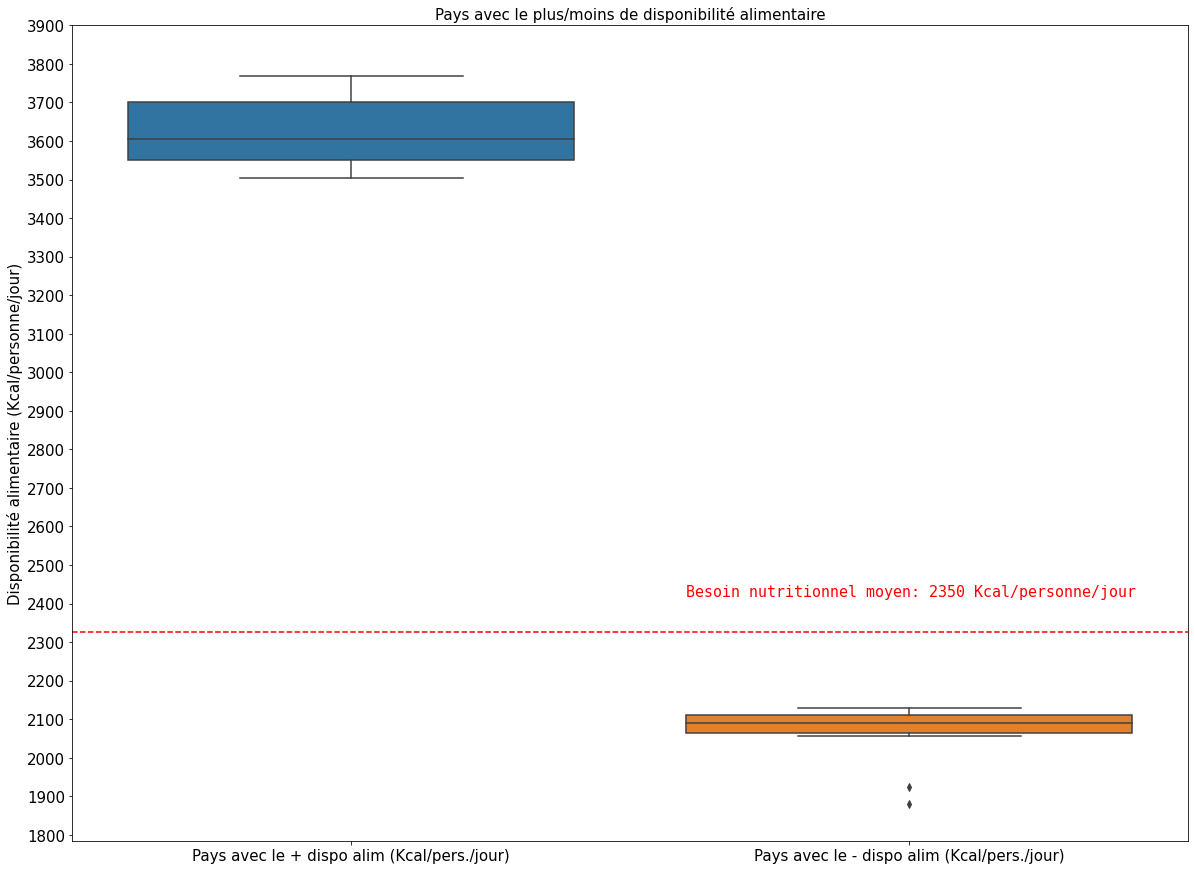

In [96]:
# Création de boîte à moustaches permettant de comparer la disponibilité alimentaire (Kcal/personne/jour)
# entre les 10 pays ayant le plus ou le moins de disponibilité.

fig, ax = plt.subplots(figsize=(20,15))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

# Boîte à moustache
sns.boxplot(x="Type", y="Disponibilité alimentaire (Kcal/personne/jour)", 
            data=assemblage).set(xlabel='', ylabel="Disponibilité alimentaire (Kcal/personne/jour)")

# Ligne horizontal
ax.axhline(y = moyenne_besoin_energ_moyen, linestyle='dashed', color= 'red')

# Graduation de l'axe y.
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(1800, 4000, 100))
ax.set_ylabel("Disponibilité alimentaire (Kcal/personne/jour)", size =15)


# Texte
ax.text = plt.text(x=0.55, # en bas à gauche (0.0), en haut à droite (1,1) avec transform=ax.transAxes
               y=0.3, # en bas à gauche (0.0), en haut à droite (1,1) avec transform=ax.transAxes
               s =  "Besoin nutritionnel moyen: 2350 Kcal/personne/jour", # texte
               fontdict= dict(fontsize=15, color='b', family= 'monospace'),
               # caractéristique du contour
               transform=ax.transAxes) # le système de coordoonéee est le suivant: 
# en bas à gauche (0.0), en haut à droite (1,1).
ax.text.set_color('r') # couleur du texte

       
plt.title("Pays avec le plus/moins de disponibilité alimentaire", size = 15)
plt.show()

On s'intéresse maintenant aux **pertes (en milliers de tonnes)** engendrés par les 10 pays ayant le plus/moins de disponibilité alimentaire par habitant.

In [97]:
# On regarde les pertes pour les dix pays ayant le plus de disponibilité par habitant en 2017.
plus_dispo_hab[["Pertes"]].sum()
# Je récupére avec iloc la valeur souhaité qui est sur la première ligne, "Pertes" est l'index.
plus_dispo_hab[["Pertes"]].sum().iloc[0] 

33938

In [98]:
# On regarde les pertes pour les dix pays ayant le moins de disponibilité par habitant en 2017.
moins_dispo_hab[["Pertes"]].sum().iloc[0]

5862

In [99]:
# On étudie les pertes pour les pays ayant le plus de disponibilité par habitant en 2017.
print("Les dix pays ayant le plus de disponibilité alimentaires par habitant en 2017 engrangent en moyenne " + 
      str(round(plus_dispo_hab[["Pertes"]].sum().iloc[0]/moins_dispo_hab[["Pertes"]].sum().iloc[0])) + 
    " fois plus de pertes que les dix pays ayant le moins de disponibilité.")

Les dix pays ayant le plus de disponibilité alimentaires par habitant en 2017 engrangent en moyenne 6 fois plus de pertes que les dix pays ayant le moins de disponibilité.


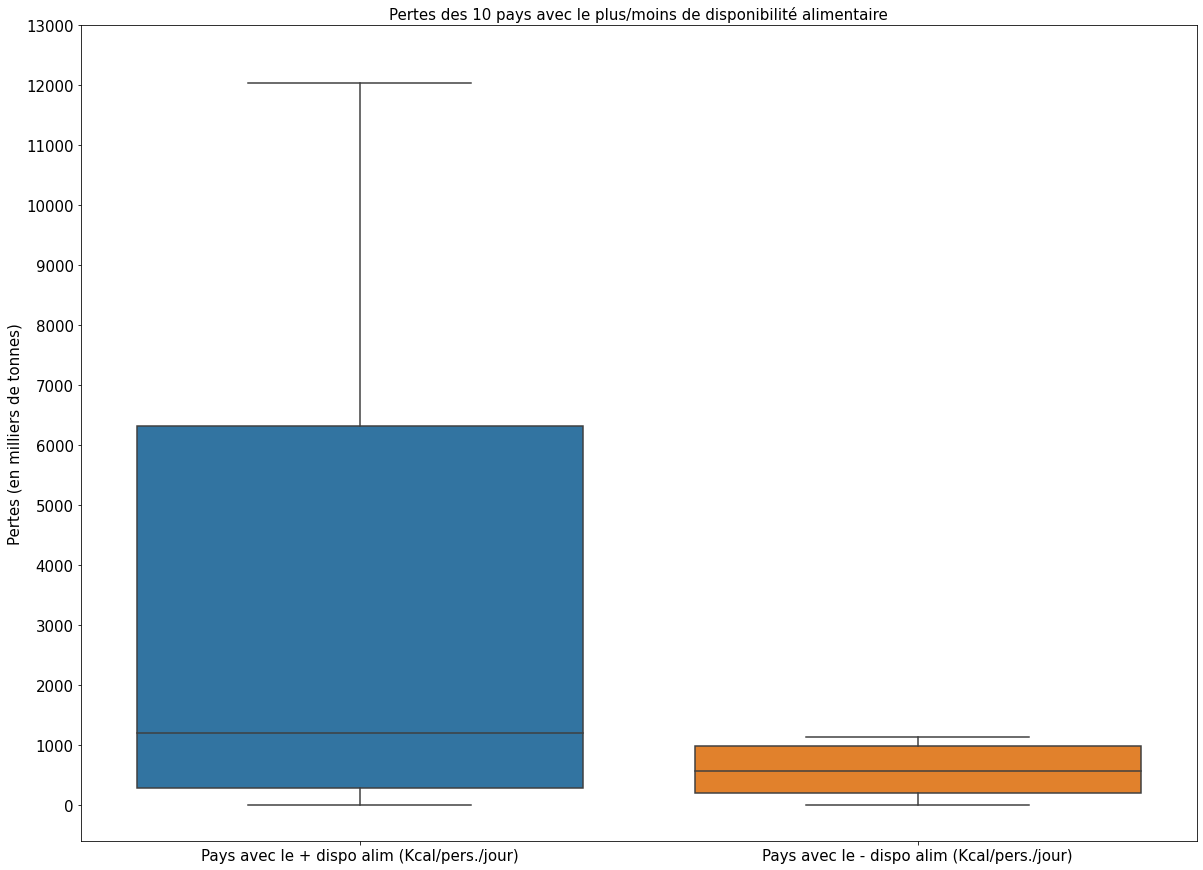

In [100]:
# Création de boîte à moustaches permettant de comparer la disponibilité alimentaire (Kcal/personne/jour)
# entre les 10 pays ayant le plus ou le moins de disponibilité.

fig, ax = plt.subplots(figsize=(20,15))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

# Boîte à moustache
sns.boxplot(x="Type", y="Pertes", 
            data=assemblage).set(xlabel='', ylabel="Pertes")


# Graduation de l'axe y.
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, 14000, 1000))
ax.set_ylabel("Pertes (en milliers de tonnes)", size =15)


       
plt.title("Pertes des 10 pays avec le plus/moins de disponibilité alimentaire", size = 15)
plt.show()